## Coursera Data Science Capstone Project
### Final assignment
#### Bostjan Keber
##### 2019/02/01

#### Problem description
“Metropolitan Café”, an US-based coffee shop franchise company wants to enter European market. They chose Barcelona, Spain as the first city where they want to try their concept in the EU and open two coffee shops. 
“Metropolitan Café” offers two coffee shop concepts:
- “Hip Café” is their premium offering for mid- to high-end of the market; these coffee shops are usually placed in the best locations in the city;
- “Budget Café” is their low-cost offering, targeting price-conscious customers; these coffee shops are usually placed in cheaper locations; however, these locations must share certain characteristics with locations of their premium offering.

The purpose of the project is to answer the following question: what are the best locations to open “Hip Café” and “Budget Café” in Barcelona, Spain?

As Metropolitan Café has no data on Barcelona or Spain in general, we have to answer that question by trying to find locations in Barcelona with similar characteristics to their best performing locations in New York City, which are: Gramercy, Turtle Bay, Little Italy, West Village, Manhattanville.

#### Data to be used to solve the problem
-  data provided by the Applied data science course “newyork_data.json”
- Wikipedia scrapped Barcelona districts and neighborhoods
- Barcelona location coordinated: GeoPy geocoder
- Venue categories: Foursquare’s venues/explore API 

### First import all libraries needed for the project

In [2]:
#import libraries
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import json # library to handle JSON files
!pip install geocoder
import geocoder
!conda install -c conda-forge folium=0.5.0 --yes
import folium

    100% |████████████████████████████████| 102kB 12.6MB/s 
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cryptography-2.4.2         |   py36h1ba5d50_0         618 KB
    openssl-1.1.1a             |    h14c3975_1000         4.0 MB  conda-forge
    libarchive-3.3.3           |       h5d8350f_5         1.5 MB
    grpcio-1.16.1              |   py36hf8bcb03_1         1.1 MB
    conda-4.6.2                |           py36_0         869 KB  conda-forge
    libssh2-1.8.0              |                1         239 KB  conda-forge
    python-3.6.8               |       h0371630_0        34.4 MB
    ------------------------------------------------------------
                                           Total:        42.6 MB

The following packages will b

In [1]:
#prepare a function get_coordinates that returns coordinates for a given neighborhood

#def get_coordinates(neighborhood):
#    lat_lng_coords = None

# loop until you get the coordinates
#    while(lat_lng_coords is None):
#      g = geocoder.arcgis('{}, Barcelona, Spain'.format(neighborhood))
#      lat_lng_coords = g.latlng
#    return lat_lng_coords

#### Data Import
I prepared a CSV with New York Manhattan neighborhoods and Barcelona districts and neighborhoods. The file contains:
- District_ID
- District
- Neighborhood
- Latitude
- Longitude

NYC only has 1 district - borough (Manhattan), whereas Barcelona has 10 districts and 70+ neighborhoods.

Let's load the data into pandas dataframe called df_temp.


In [6]:
df_temp = pd.read_csv('bcn_nyc.csv')        #source data is in file bcn_nyc.csv
df_temp=df_temp.drop('Unnamed: 0', axis=1)  #let's get rid of an unnecessary column
df_temp.head(50)                            #let's inspect first 50 rows

,District_ID,District,Neighborhood,Latitude,Longitude
0,0,Manhattan,Marble Hill,40.876551,-73.910660
1,0,Manhattan,Chinatown,40.715618,-73.994279
2,0,Manhattan,Washington Heights,40.851903,-73.936900
3,0,Manhattan,Inwood,40.867684,-73.921210
4,0,Manhattan,Hamilton Heights,40.823604,-73.949688
5,0,Manhattan,Manhattanville,40.816934,-73.957385
6,0,Manhattan,Central Harlem,40.815976,-73.943211
7,0,Manhattan,East Harlem,40.792249,-73.944182
8,0,Manhattan,Upper East Side,40.775639,-73.960508
9,0,Manhattan,Yorkville,40.775930,-73.947118


#### Visualization
Let's check the map of Barcelona. We will use choropleth to mark districts (10) and blue circle dots to show neighborhoods.

In [7]:
#let's visualize Barcelona on a map
address = 'Barcelona, Spain'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barcelona, Spain are {}, {}.'.format(latitude, longitude))

bcn_geo = 'bcn_districtes_geo.json' # geojson file
bcn_geo
bcn_map_2 = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Terrain')
bcn_map_2.choropleth(
    geo_data=bcn_geo,
    data=df_temp,
    columns=['District', 'District_ID'],
    key_on='feature.properties.N_Distri',
    fill_color='YlGn', 
    fill_opacity=0.6, 
    line_opacity=0.6,
)

for lat, lng, label, distrId, district in zip(df_temp['Latitude'], df_temp['Longitude'], df_temp['Neighborhood'], df_temp['District_ID'], df_temp['District']):
    label = folium.Popup(district+' - '+label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        #fill_color=rainbow(int(distrId)),
        fill_opacity=0.3,
        parse_html=False).add_to(bcn_map_2)  

# display map
bcn_map_2

The geograpical coordinate of Barcelona, Spain are 41.3828939, 2.1774322.


### Obtain Foursquare data for Barcelona and NYC
We have to enrich data in the df_temp dataframe with venues. We are interested in venue categories to characterize neighborhoods of Manhattan and Barcelona.

Venue category frequency will be later used for clustering and finding similar neighborhoods in NYC and Barcelona.

In [8]:
#initialize Foursquare API calls
import requests
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

CLIENT_ID = 'TZCKCZNMYA5VRVPEGM15CRQ1JQP4JLAE2EYAVH1IX5Z5OY5H' # your Foursquare ID
CLIENT_SECRET = 'LXSH0MF3AXP4WK5H4FBAX2E0O4TAE2CDII3XQVKI2IZ4CVMX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 300 # define radius - 300 meters

Your credentails:
CLIENT_ID: TZCKCZNMYA5VRVPEGM15CRQ1JQP4JLAE2EYAVH1IX5Z5OY5H
CLIENT_SECRET:LXSH0MF3AXP4WK5H4FBAX2E0O4TAE2CDII3XQVKI2IZ4CVMX


In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Just as a test, let's see what Foursquare's venues/explore API reurns for a given location.

In [10]:
#inicialization
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,La Alcoba Azul,Spanish Restaurant,41.382833,2.175506
1,Barrio Gótico,Neighborhood,41.383660,2.177290
2,Gelaaati! di Marco,Ice Cream Shop,41.383186,2.177369
3,Plaça de Sant Jaume,Plaza,41.382690,2.177010
4,Plaça de Sant Felip Neri,Plaza,41.383378,2.175152


#### Fill venue categories for all neighborhoods
We need to invoke Foursquare's API for all neighborhoods of NYC and Barcelona. We are interested in categories of returned venues.

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

A new dataframe called "all_venues" is like the initial df_temp plus:
    - venue
    - venue category
    - venue coordinates (lat, long)

In [14]:
all_venues = getNearbyVenues(names=df_temp['Neighborhood'],
                                   latitudes=df_temp['Latitude'],
                                   longitudes=df_temp['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
La Barceloneta
El Gòtic
El Raval
Sant Pere
Santa Caterina i la Ribera
L'Antiga Esquerra de l'Eixample
La Nova Esquerra de l'Eixample
Dreta de l'Eixample
Fort Pienc
Sagrada Família
Sant Antoni
La Bordeta
la Font de la Guatlla
Hostafrancs
la Marina de Port
la Marina del Prat Vermell
El Poble-sec
Sants
Sants-Badal
Montjuïc
Zona Franca - Port
les Corts
la Maternitat i Sant Ramon
Pedralbes
El Putget i Farró
Sarrià
Sant Gervasi - la Bonanova
Sant Gervasi - Galvany
les Tres Torres
Vallv

In [15]:
#Let's see the result
all_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Rite Aid,40.875467,-73.908906,Pharmacy
2,Marble Hill,40.876551,-73.91066,GameStop,40.874267,-73.909342,Video Game Store
3,Marble Hill,40.876551,-73.91066,Subway Sandwiches,40.874667,-73.909586,Sandwich Place
4,Marble Hill,40.876551,-73.91066,Chase Bank,40.874334,-73.909653,Bank


### Data transformation
We have to transform the data do that it will be suitable for unsupervised learning (K-means clustering).
First, let's add one-hot encoding of venue categories.

In [16]:
# one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Neighborhood'] = all_venues['Neighborhood'] 

#let's see the result
all_onehot.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Game Store,Vietnamese Restaurant,Watch Shop,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now let's create an "all_grouped" dataframe which take hot-encoded dataframe from the previous step and calculates mean frequencies of venue categories and groups them by neighborhoods.

In [17]:
all_grouped = all_onehot.groupby('Neighborhood').mean().reset_index()
all_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,...,Video Game Store,Vietnamese Restaurant,Watch Shop,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Baró de Viver,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Battery Park City,0.000000,0.00,0.0,0.000000,0.023810,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.023810,0.000000,0.000000,0.023810,0.000000
2,Bon Pastor,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Can Baró,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Can Peguera,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Canyelles,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Carnegie Hill,0.000000,0.00,0.0,0.000000,0.022222,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.022222,0.022222,0.000000,0.000000,0.000000
7,Central Harlem,0.000000,0.00,0.0,0.060606,0.030303,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Chelsea,0.000000,0.00,0.0,0.000000,0.024390,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024390,0.000000,0.024390,0.000000
9,Chinatown,0.000000,0.00,0.0,0.000000,0.024390,0.0,0.000000,0.00,0.000000,...,0.0,0.060976,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195


In [18]:
#check the shape
all_grouped.shape

(115, 335)

#### Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.
The new dataframe will be called "neighborhoods_venues_sorted" and will contain columns indicating 1st most common cenue,....,10th most common venue.

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = all_grouped['Neighborhood']

for ind in np.arange(all_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baró de Viver,Bus Station,Plaza,Metro Station,Bakery,Field,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop
1,Battery Park City,Park,Cupcake Shop,Food Court,Coffee Shop,Sandwich Place,Department Store,Seafood Restaurant,Food Truck,Boutique,Men's Store
2,Bon Pastor,Café,Athletics & Sports,Tapas Restaurant,Metro Station,Yoga Studio,English Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
3,Can Baró,Chinese Restaurant,Department Store,Grocery Store,Scenic Lookout,Coffee Shop,Basketball Court,Historic Site,Dessert Shop,Plaza,Filipino Restaurant
4,Can Peguera,Park,Yoga Studio,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market


In [21]:
#let's inspect the shape!
neighborhoods_venues_sorted.shape

(115, 11)

### Cluster Neighborhoods¶
We are trying to identify which Barcelona neighborhoods share characteristics (i.e. have similar venue categories) with Manhattan neighborhoods.

This is an unsupervised machine learning problem - clustering. 

We will run k-means to cluster the neighborhood into 10 clusters.

Later we discuss how to find an optimal K-value.

In [93]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 8

all_grouped_clustering = all_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]


array([0, 1, 2, 1, 7, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1],
      dtype=int32)

In [94]:
#let's inspect the size - ha sto be 115
len(kmeans.labels_)

115

#### Final result - districts, neighborhoods with cluster label and 10 most common venue categs
We will take the initial dataframe and add cluster list.
Then we will join this dataframe with neighborhoods_venues_sorted which will add 10 most common venue categories.

In [95]:
all_merged = df_temp

# add clustering labels
all_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
all_merged = all_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#let's check the result
all_merged.head()

,District_ID,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Manhattan,Marble Hill,40.876551,-73.910660,0,Deli / Bodega,Chinese Restaurant,Supermarket,Bus Station,Mattress Store,Bank,Sandwich Place,Train Station,Pharmacy,Food
1,0,Manhattan,Chinatown,40.715618,-73.994279,1,Bubble Tea Shop,Vietnamese Restaurant,Chinese Restaurant,Bar,Hotpot Restaurant,Salon / Barbershop,Sandwich Place,American Restaurant,Dumpling Restaurant,Dim Sum Restaurant
2,0,Manhattan,Washington Heights,40.851903,-73.936900,2,Café,Chinese Restaurant,Pizza Place,Deli / Bodega,Park,Bakery,Mobile Phone Shop,Donut Shop,Grocery Store,Shipping Store
3,0,Manhattan,Inwood,40.867684,-73.921210,1,Café,Bakery,American Restaurant,Restaurant,Chinese Restaurant,Deli / Bodega,Wine Bar,Frozen Yogurt Shop,Mexican Restaurant,Bistro
4,0,Manhattan,Hamilton Heights,40.823604,-73.949688,7,Café,Yoga Studio,Mexican Restaurant,Caribbean Restaurant,Cocktail Bar,Pub,Deli / Bodega,Bar,Gastropub,Mediterranean Restaurant


In [96]:
#save the result to CSV
all_merged.to_csv('nyc_bcn_clusters.csv')
#save to excel
all_merged.to_excel('nyc_bcn_clusters.xls')

### Cluster visualization
Now let's show the map of Barcelona with dots indicating to which cluster each neighborhood belongs.

In [97]:
# create map with all clusters
#map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

bcn_map_clus = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Terrain')

bcn_map_clus.choropleth(
    geo_data=bcn_geo,
    data=df_temp,
    columns=['District', 'District_ID'],
    key_on='feature.properties.N_Distri',
    fill_color='YlGn', 
    fill_opacity=0.6, 
    line_opacity=0.6,
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, district in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels'], all_merged['District']):
    label = folium.Popup(str(district)+' - '+str(poi) + ' Cluster: ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(bcn_map_clus)
    
bcn_map_clus

### Let's explore clusters
We want to find out which Manhattan neighborhoods are similar to which Barcelona neighborhoods.
Let's inspect clusters one by one.

In [98]:
# Cluster 0
all_merged.loc[all_merged['Cluster Labels'] == 0, all_merged.columns[[1,2] + list(range(5, all_merged.shape[1]))]]

,District,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,0,Deli / Bodega,Chinese Restaurant,Supermarket,Bus Station,Mattress Store,Bank,Sandwich Place,Train Station,Pharmacy,Food
18,Manhattan,Greenwich Village,0,Italian Restaurant,Clothing Store,Cosmetics Shop,French Restaurant,Boutique,Sushi Restaurant,Juice Bar,Electronics Store,Café,Seafood Restaurant
44,Ciutat Vella,Santa Caterina i la Ribera,0,Mediterranean Restaurant,Gourmet Shop,Restaurant,Yoga Studio,Farmers Market,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop
77,Horta-Guinardó,El Guinardó,0,Plaza,Grocery Store,Restaurant,Café,Tapas Restaurant,Pharmacy,Bar,Fabric Shop,Empanada Restaurant,English Restaurant
98,Nou Barris,Vilapicina i la Torre Llobeta,0,Bar,Breakfast Spot,Restaurant,Tapas Restaurant,Café,Supermarket,Asian Restaurant,Grocery Store,Italian Restaurant,Hot Dog Joint
105,Sant Martí,El Besòs i el Maresme,0,Bakery,Farmers Market,Climbing Gym,Metro Station,Bar,Food & Drink Shop,Falafel Restaurant,English Restaurant,Ethiopian Restaurant,Event Space
106,Sant Martí,el Clot,0,Tapas Restaurant,Mediterranean Restaurant,Spanish Restaurant,Fried Chicken Joint,Tech Startup,Park,Pastry Shop,Bakery,Café,Greek Restaurant


In [99]:
# Cluster 1
all_merged.loc[all_merged['Cluster Labels'] == 1, all_merged.columns[[1,2] + list(range(5, all_merged.shape[1]))]]

,District,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Manhattan,Chinatown,1,Bubble Tea Shop,Vietnamese Restaurant,Chinese Restaurant,Bar,Hotpot Restaurant,Salon / Barbershop,Sandwich Place,American Restaurant,Dumpling Restaurant,Dim Sum Restaurant
3,Manhattan,Inwood,1,Café,Bakery,American Restaurant,Restaurant,Chinese Restaurant,Deli / Bodega,Wine Bar,Frozen Yogurt Shop,Mexican Restaurant,Bistro
6,Manhattan,Central Harlem,1,Cosmetics Shop,African Restaurant,Caribbean Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Library,Gym / Fitness Center,Lounge,Beer Bar,Breakfast Spot
7,Manhattan,East Harlem,1,Mexican Restaurant,Latin American Restaurant,Spanish Restaurant,Park,Beer Bar,Bakery,Donut Shop,Clothing Store,Pet Store,Coffee Shop
8,Manhattan,Upper East Side,1,Art Gallery,Italian Restaurant,Hotel,Boutique,Coffee Shop,Juice Bar,Bakery,Chocolate Shop,Bridal Shop,Gym / Fitness Center
9,Manhattan,Yorkville,1,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym,Wine Shop,Pizza Place,Burger Joint,Café,Monument / Landmark,Shoe Store
11,Manhattan,Roosevelt Island,1,Indie Theater,Deli / Bodega,Cosmetics Shop,Bubble Tea Shop,Supermarket,Farmers Market,Greek Restaurant,Liquor Store,Sandwich Place,Train
12,Manhattan,Upper West Side,1,Italian Restaurant,Burger Joint,American Restaurant,Cosmetics Shop,Accessories Store,Nail Salon,Southern / Soul Food Restaurant,Shoe Store,Café,Seafood Restaurant
13,Manhattan,Lincoln Square,1,Concert Hall,Theater,Plaza,Opera House,Indie Movie Theater,Performing Arts Venue,Park,American Restaurant,Electronics Store,Gym / Fitness Center
14,Manhattan,Clinton,1,Theater,Hotel,Wine Shop,Sandwich Place,Restaurant,American Restaurant,Indie Theater,Spa,Coffee Shop,Pizza Place


Cluster 1 is more promising and shows several NYC and Barcelona neighborhoods with shared characteristics.

In [100]:
# Cluster 2
all_merged.loc[all_merged['Cluster Labels'] == 2, all_merged.columns[[1,2] + list(range(5, all_merged.shape[1]))]]

,District,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Manhattan,Washington Heights,2,Café,Chinese Restaurant,Pizza Place,Deli / Bodega,Park,Bakery,Mobile Phone Shop,Donut Shop,Grocery Store,Shipping Store
5,Manhattan,Manhattanville,2,Thai Restaurant,Asian Restaurant,Music School,Bus Station,Shipping Store,Chinese Restaurant,Sandwich Place,Lounge,Climbing Gym,Bar
10,Manhattan,Lenox Hill,2,Coffee Shop,Pizza Place,Chinese Restaurant,Gym,Turkish Restaurant,Salon / Barbershop,Gift Shop,Italian Restaurant,Wine Shop,Furniture / Home Store
17,Manhattan,Chelsea,2,Nightclub,Hotel,Ice Cream Shop,Theater,Bakery,Asian Restaurant,Italian Restaurant,Music Venue,Bar,Beer Bar
21,Manhattan,Tribeca,2,American Restaurant,Greek Restaurant,Spa,Steakhouse,Café,Park,Playground,Chinese Restaurant,Boutique,Salad Place
22,Manhattan,Little Italy,2,Bakery,Coffee Shop,Café,Sandwich Place,Ice Cream Shop,Italian Restaurant,Massage Studio,Gourmet Shop,Chinese Restaurant,Grocery Store
24,Manhattan,West Village,2,Italian Restaurant,Cosmetics Shop,Gastropub,Wine Bar,Clothing Store,Men's Store,Coffee Shop,Jazz Club,Speakeasy,Boutique
27,Manhattan,Gramercy,2,Coffee Shop,Thrift / Vintage Store,Wine Shop,Spa,Bank,Bagel Shop,Diner,Thai Restaurant,Bar,Pizza Place
41,Ciutat Vella,El Gòtic,2,Plaza,Spanish Restaurant,Vegetarian / Vegan Restaurant,Hotel,Tapas Restaurant,Dessert Shop,Ice Cream Shop,Cocktail Bar,Bar,Coffee Shop
43,Ciutat Vella,Sant Pere,2,Plaza,Hotel,Café,Spanish Restaurant,Ice Cream Shop,Dessert Shop,Tapas Restaurant,Coffee Shop,Bar,Japanese Restaurant


Cluster 2 is interesing! Our initial assumption was that best performing locations in NYS are Gramercy, Turtle Bay, Little Italy, West Village, and Manhattanville.
4/5 neighborhoods belong to this cluster!

In [101]:
# Cluster 3
all_merged.loc[all_merged['Cluster Labels'] == 3, all_merged.columns[[1,2] + list(range(5, all_merged.shape[1]))]]

,District,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Sants-Montjuïc,El Poble-sec,3,Tapas Restaurant,Hostel,Pizza Place,Yoga Studio,Café,Mediterranean Restaurant,Monument / Landmark,Brewery,Spanish Restaurant,Cocktail Bar
60,Sants-Montjuïc,Zona Franca - Port,3,Spanish Restaurant,Supermarket,Plaza,Auto Garage,Mediterranean Restaurant,Bus Stop,Yoga Studio,Farmers Market,Ethiopian Restaurant,Event Space
72,Gràcia,el Camp d'en Grassot i Gràcia Nova,3,Bar,Bakery,Café,Mediterranean Restaurant,Supermarket,Diner,Farmers Market,Japanese Restaurant,Sandwich Place,Lounge
75,Gràcia,Vallcarca i els Penitents,3,Café,Park,Hotel,Restaurant,Pool,Plaza,Burger Joint,Garden,Falafel Restaurant,Empanada Restaurant
97,Nou Barris,Verdum,3,Spanish Restaurant,Brewery,Gift Shop,South American Restaurant,Grocery Store,Coffee Shop,Farmers Market,English Restaurant,Ethiopian Restaurant,Event Space
100,Sant Andreu,Bon Pastor,3,Café,Athletics & Sports,Tapas Restaurant,Metro Station,Yoga Studio,English Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant


In [102]:
# Cluster 4
all_merged.loc[all_merged['Cluster Labels'] == 4, all_merged.columns[[1,2] + list(range(5, all_merged.shape[1]))]]

,District,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
88,Nou Barris,Canyelles,4,Grocery Store,Food Court,Food & Drink Shop,Food,Spanish Restaurant,Seafood Restaurant,Fabric Shop,Electronics Store,Empanada Restaurant,English Restaurant


In [103]:
# Cluster 5
all_merged.loc[all_merged['Cluster Labels'] == 5, all_merged.columns[[1,2] + list(range(5, all_merged.shape[1]))]]

,District,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
90,Nou Barris,La Guineueta,5,Grocery Store,Food Court,Seafood Restaurant,Food,Spanish Restaurant,Fabric Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant


Cluster 5 is also interesting. Manhattanville is listed as one of the best performing location and El Gòtic	 in Barcelona looks similar. In fact, there are only 2 neighborhoods in this cluster, 1 in NYC and one in Barcelona.

In [104]:
# Cluster 6
all_merged.loc[all_merged['Cluster Labels'] == 6, all_merged.columns[[1,2] + list(range(5, all_merged.shape[1]))]]

,District,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Manhattan,Sutton Place,6,Indian Restaurant,Juice Bar,Gym / Fitness Center,Coffee Shop,Yoga Studio,Grocery Store,Gym,Mediterranean Restaurant,Furniture / Home Store,Beer Garden


In [105]:
# Cluster 7
all_merged.loc[all_merged['Cluster Labels'] == 7, all_merged.columns[[1,2] + list(range(5, all_merged.shape[1]))]]

,District,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Manhattan,Hamilton Heights,7,Café,Yoga Studio,Mexican Restaurant,Caribbean Restaurant,Cocktail Bar,Pub,Deli / Bodega,Bar,Gastropub,Mediterranean Restaurant


### Recommendation
The business gave us input that the best performing locations in the NYC are:
- Gramercy, 
- Turtle Bay, 
- Little Italy, 
- West Village, 
- Manhattanville

Gramercy, Little Italy, and West Village, and Manhattanville belong to cluster 2. This will be our first recommendation.
Turtle Bay belongs to the cluster 1, so this will be our second recommendation.

Our recommendation, therefore, will be to consider neighborhoods from clusters 2 and 1 for new coffee shops in Barcelona.

In [108]:
## let's draw just clusters suitable to place a coffee shop:

# create map
#map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

bcn_map_clus = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Terrain')

bcn_map_clus.choropleth(
    geo_data=bcn_geo,
    data=df_temp,
    columns=['District', 'District_ID'],
    key_on='feature.properties.N_Distri',
    fill_color='YlGn', 
    fill_opacity=0.6, 
    line_opacity=0.6,
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, district in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels'], all_merged['District']):
    label = folium.Popup(str(district)+' - '+str(poi) + ' Cluster: ' + str(cluster), parse_html=True)
    if cluster == 2:
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(bcn_map_clus)
    
bcn_map_clus

In [109]:
## let's draw just clusters suitable to place a coffee shop:
# clusters 1, 2
# create map
#map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

bcn_map_clus = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Terrain')

bcn_map_clus.choropleth(
    geo_data=bcn_geo,
    data=df_temp,
    columns=['District', 'District_ID'],
    key_on='feature.properties.N_Distri',
    fill_color='YlGn', 
    fill_opacity=0.6, 
    line_opacity=0.6,
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, district in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels'], all_merged['District']):
    label = folium.Popup(str(district)+' - '+str(poi) + ' Cluster: ' + str(cluster), parse_html=True)
    if cluster == 2 or cluster == 1:
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(bcn_map_clus)
    
bcn_map_clus

## Appendices

### Finding the best K-means

In [91]:
#finding ideal K
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertia = []
K = range(1,13)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(all_grouped_clustering)
    kmeanModel.fit(all_grouped_clustering)
    distortions.append(sum(np.min(cdist(all_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / all_grouped_clustering.shape[0])
    inertia.append(kmeanModel.inertia_)

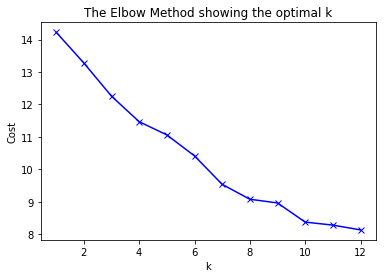

In [92]:
plt.plot()
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Top 5 venues of each neighborhood
Run the code below to find out which are the top 5 venue categories in each neighborhood

In [110]:
num_top_venues = 5

for hood in all_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = all_grouped[all_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baró de Viver----
           venue  freq
0         Bakery  0.25
1    Bus Station  0.25
2  Metro Station  0.25
3          Plaza  0.25
4     Non-Profit  0.00


----Battery Park City----
              venue  freq
0              Park  0.10
1    Sandwich Place  0.05
2       Coffee Shop  0.05
3        Food Court  0.05
4  Department Store  0.05


----Bon Pastor----
                venue  freq
0                Café   0.4
1    Tapas Restaurant   0.2
2       Metro Station   0.2
3  Athletics & Sports   0.2
4        Perfume Shop   0.0


----Can Baró----
                venue  freq
0    Basketball Court  0.11
1      Scenic Lookout  0.11
2  Chinese Restaurant  0.11
3       Grocery Store  0.11
4    Department Store  0.11


----Can Peguera----
                   venue  freq
0                   Park   1.0
1      Accessories Store   0.0
2    Peruvian Restaurant   0.0
3  Performing Arts Venue   0.0
4       Pedestrian Plaza   0.0


----Canyelles----
                venue  freq
0       Grocery Store  0